# Superstore_EDA 
## To explore Business Analytics

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

In [2]:
data = pd.read_csv("superstore.csv")
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.shape

(9994, 13)

In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# cleaning the data

In [7]:
# removing the country column
data=data.drop(['Country'], axis=1)

In [8]:
# checking the null counts
pd.DataFrame(data.isnull().sum(),columns=['Number of missing values'])

,Number of missing values
Ship Mode,0
Segment,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0
Quantity,0


In [9]:
data.duplicated()
data.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [10]:
data.duplicated().sum()

17

In [11]:
data.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [13]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [14]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [15]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
df = data.drop_duplicates(keep='first')

In [17]:
final_data = data.sort_values(by='Sales',ascending=False)

In [18]:
final_data.shape

(9994, 12)

In [19]:
#pip install plotly
import plotly
import plotly.express as px
import plotly.offline as pyo 
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#pip install cufflinks
import cufflinks as cf##To bind plotly and pandas together.

In [21]:
from plotly.offline import init_notebook_mode,plot,iplot
pyo.init_notebook_mode(connected=True)#plotly connected to jupyter in ofline mode
cf.go_offline()

In [22]:
#usng barchart
px.bar(final_data, x='Region', y='Sales')

## Calculating Z score 

In [23]:
final_data['Z-score']=(final_data.Sales - final_data.Sales.mean())/final_data.Sales.std()

In [24]:
final_data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448


In [25]:
final_data[final_data['Z-score']>3]
final_data.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.954750
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.709952
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.094200
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.601598
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.478448
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700,15.504144
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755,14.793685
4277,Standard Class,Corporate,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818,14.232077
8488,Second Class,Consumer,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840,13.670532
6425,Standard Class,Consumer,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968,13.108997


In [26]:
final_data.shape

(9994, 13)

In [27]:
final_data[final_data['Z-score']<-3]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-score


### Removing Outliers From the Dataset.

In [28]:
outliers = final_data[final_data['Z-score']<3]

In [29]:
outliers.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Z-score
6467,Standard Class,Home Office,Providence,Rhode Island,2908,East,Office Supplies,Storage,2079.400,5,0.0,582.2320,2.967600
949,Standard Class,Home Office,Philadelphia,Pennsylvania,19120,East,Furniture,Tables,2065.320,12,0.4,-619.5960,2.945008
3628,Standard Class,Consumer,Seattle,Washington,98103,West,Office Supplies,Binders,2060.744,7,0.2,643.9825,2.937666
3043,Same Day,Home Office,Long Beach,California,90805,West,Furniture,Chairs,2054.272,8,0.2,256.7840,2.927282
8168,Standard Class,Home Office,Seattle,Washington,98105,West,Furniture,Tables,2036.860,7,0.0,366.6348,2.899344


In [30]:
new_data = outliers

In [31]:
new_data.shape

(9867, 13)

> Now all the outliers are removed and out data is clean

In [32]:
# Scatter plot before removing an outliers
px.scatter(final_data,x='Region',y='Sales',size='Sales')

In [33]:
px.scatter_matrix(new_data,color='Region',title='Market',dimensions=['Sales', 'Quantity', 'Discount', 'Profit'])

## Distribution plots

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



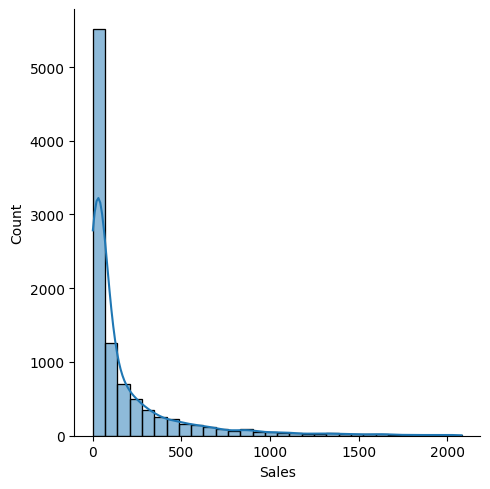

In [34]:
sns.displot(new_data['Sales'], bins=30, kde = True)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



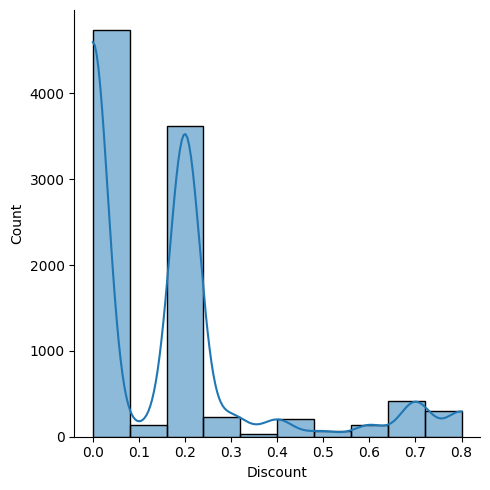

In [35]:
sns.displot(new_data['Discount'], bins=10, kde = True)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



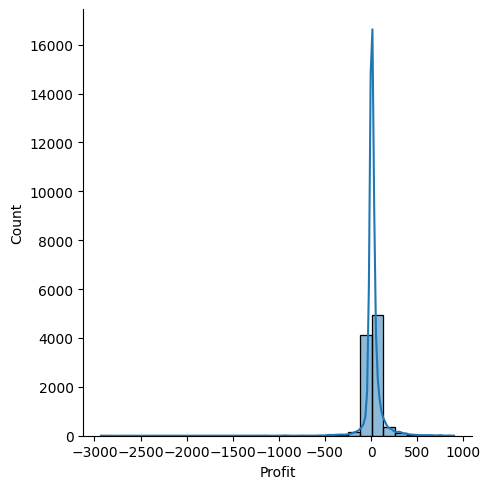

In [36]:
sns.displot(new_data['Profit'], bins=30, kde = True)

In [37]:
# Normal distribution observed in our data
new_data = new_data.drop(['Z-score','Postal Code'],axis=1)

# Correlation Matrix

In [38]:
numeric_data = new_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()


In [39]:
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.255552 -0.041876  0.271660
Quantity  0.255552  1.000000  0.010904  0.076426
Discount -0.041876  0.010904  1.000000 -0.355820
Profit    0.271660  0.076426 -0.355820  1.000000


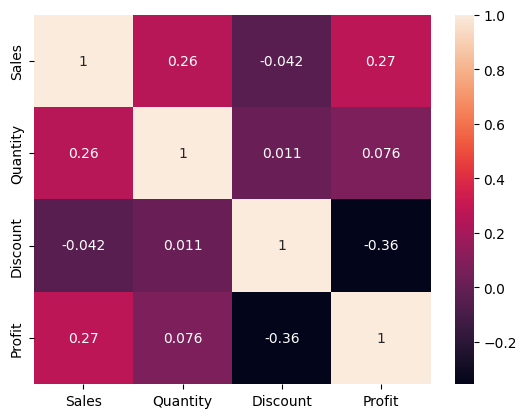

In [40]:
numeric_data = new_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


> AS WE CAN SEE CORRELATION BETWEEN SALES AND PROFIT ,QUANTITY AND SALES ARE MAJORE.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



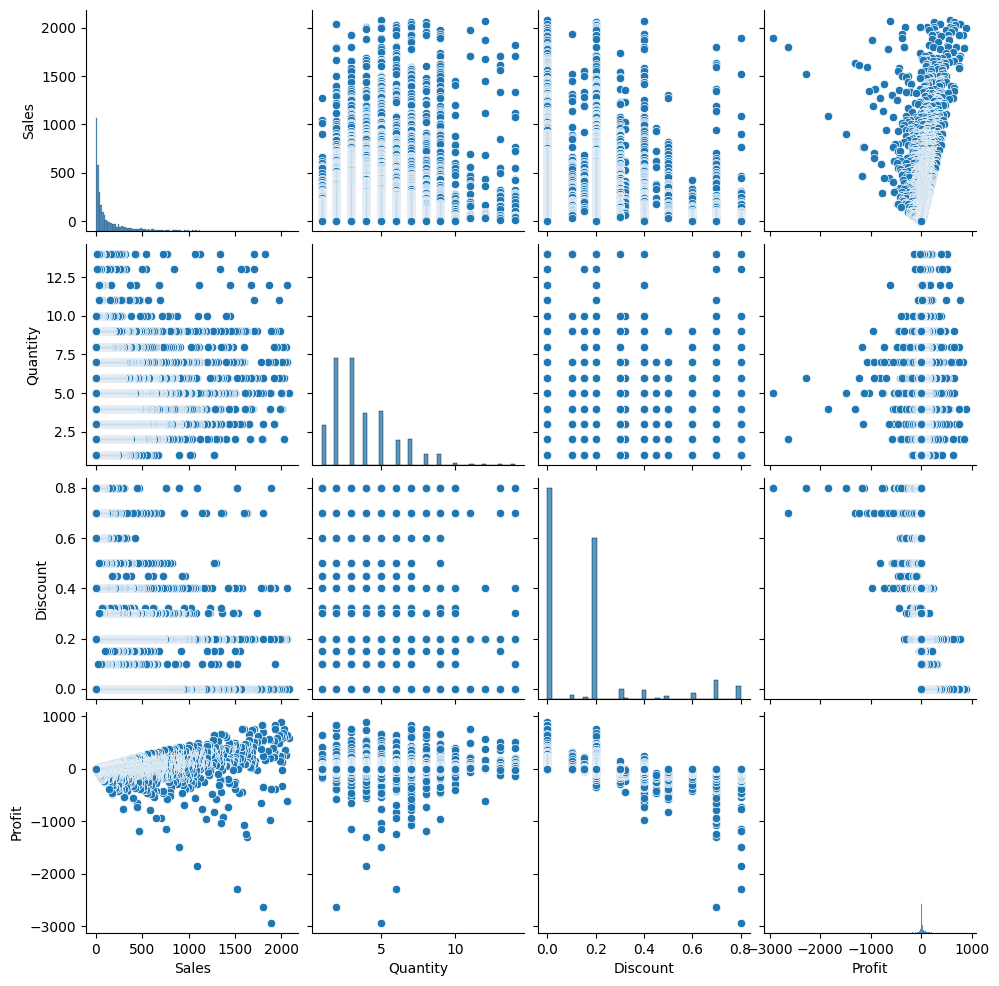

In [41]:
sns.pairplot(new_data)

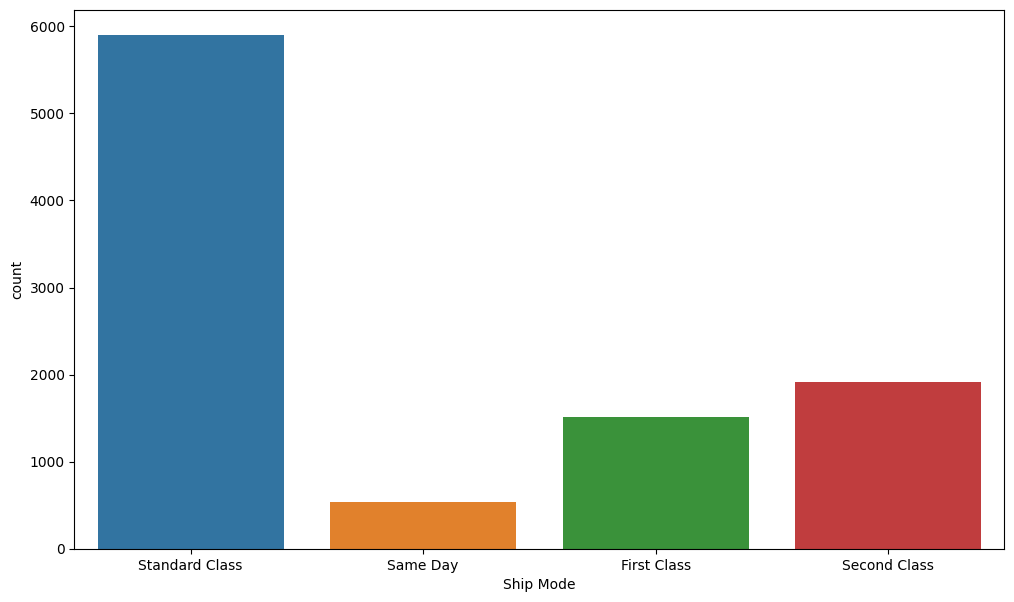

In [42]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_data['Ship Mode'])
plt.show()

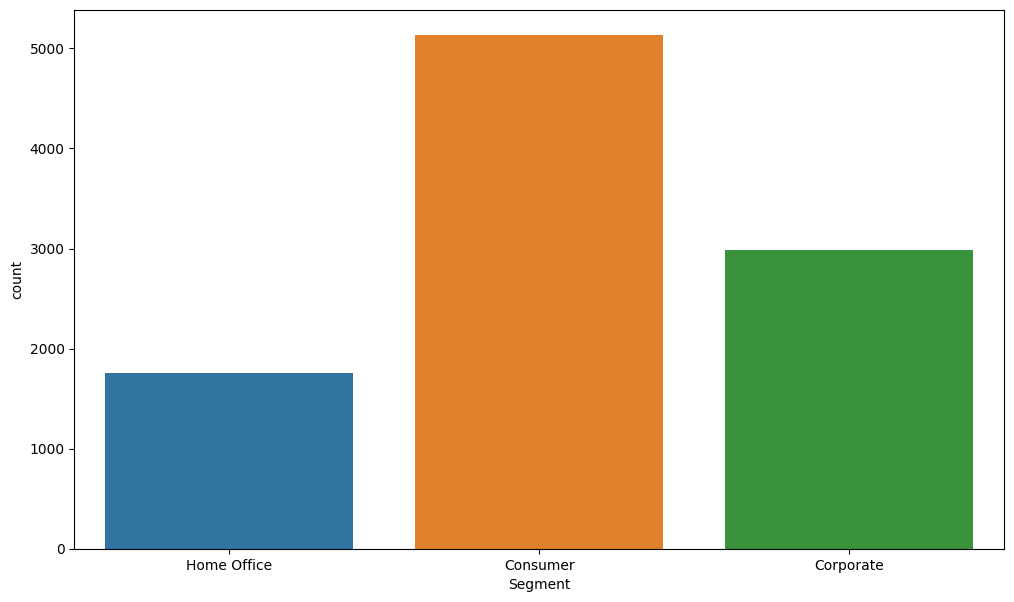

In [43]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_data['Segment'])
plt.show()

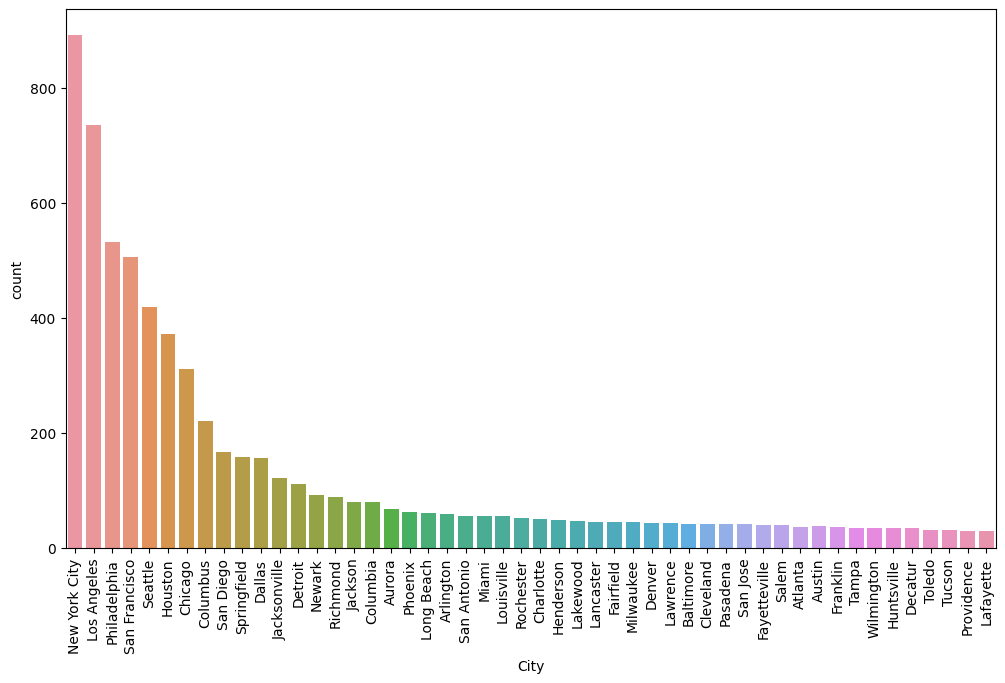

In [44]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_data["City"],order=(data['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

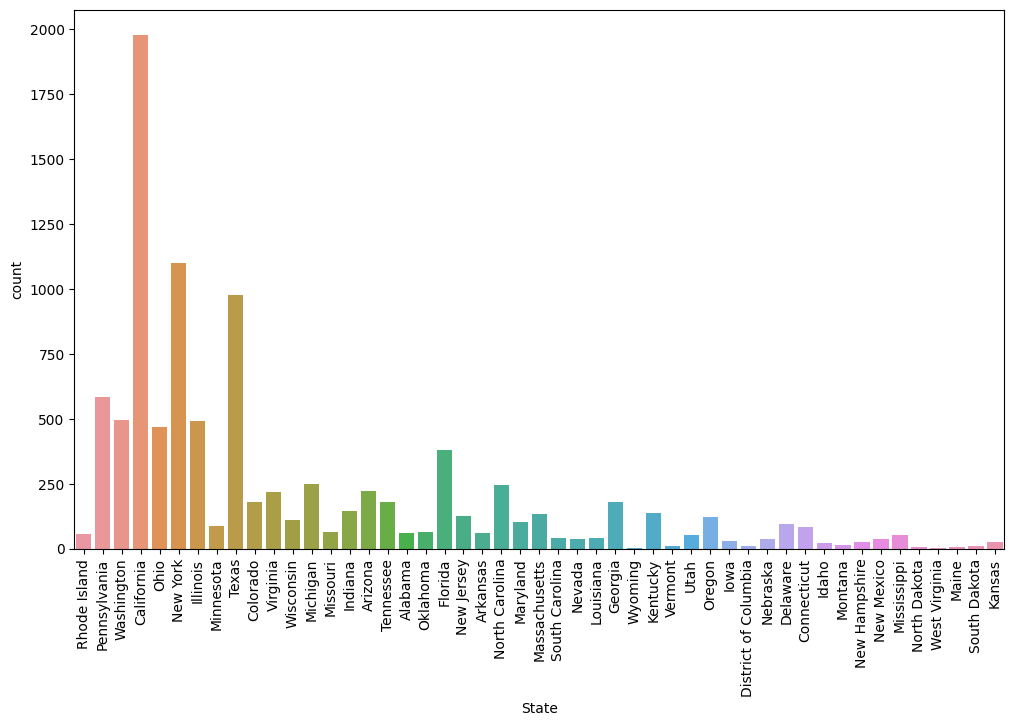

In [45]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_data["State"])
plt.xticks(rotation=90)
plt.show()

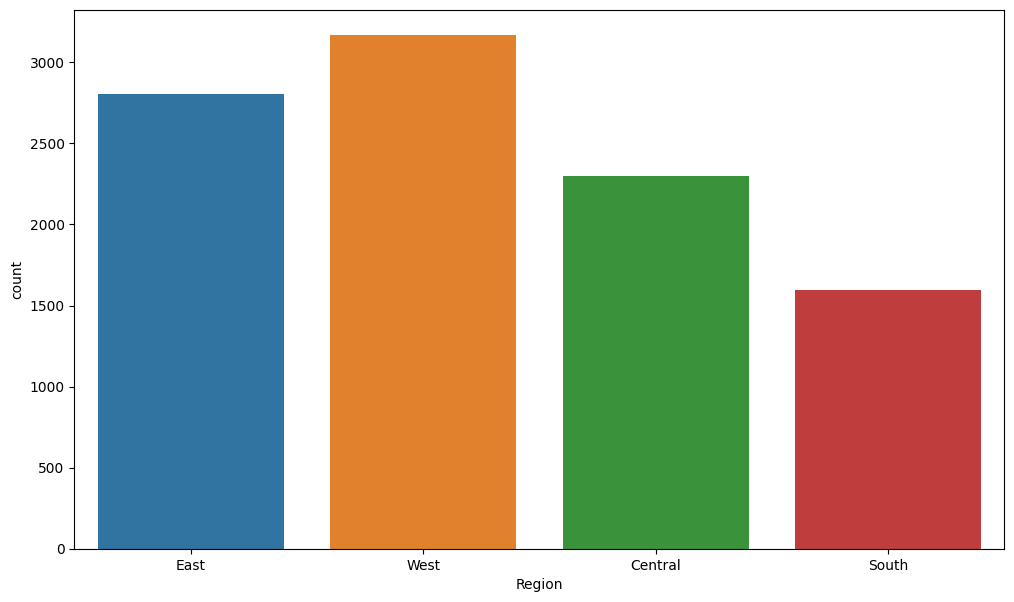

In [46]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_data["Region"])
plt.show()

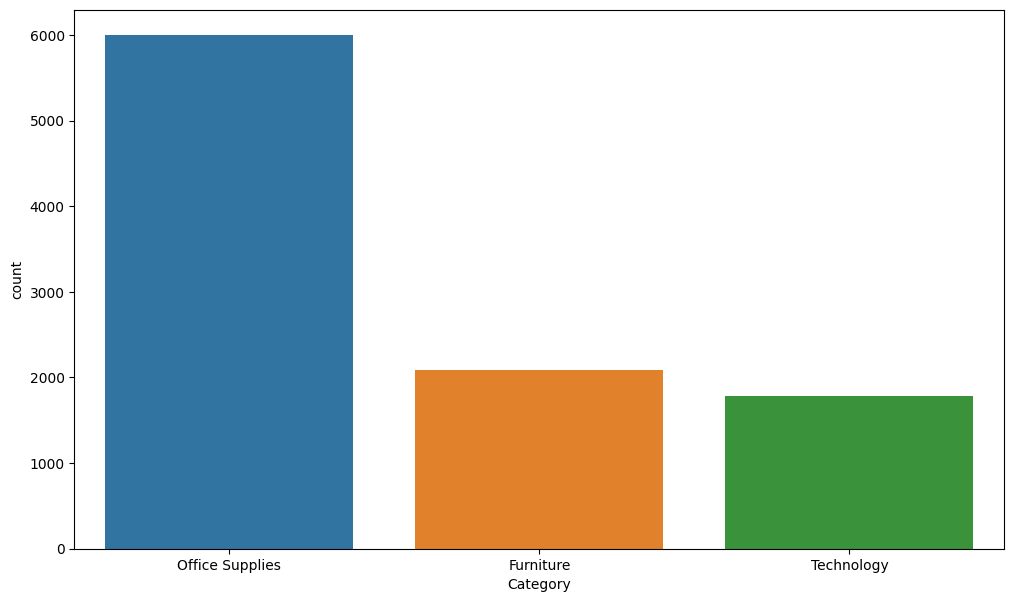

In [47]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_data["Category"])
plt.show()

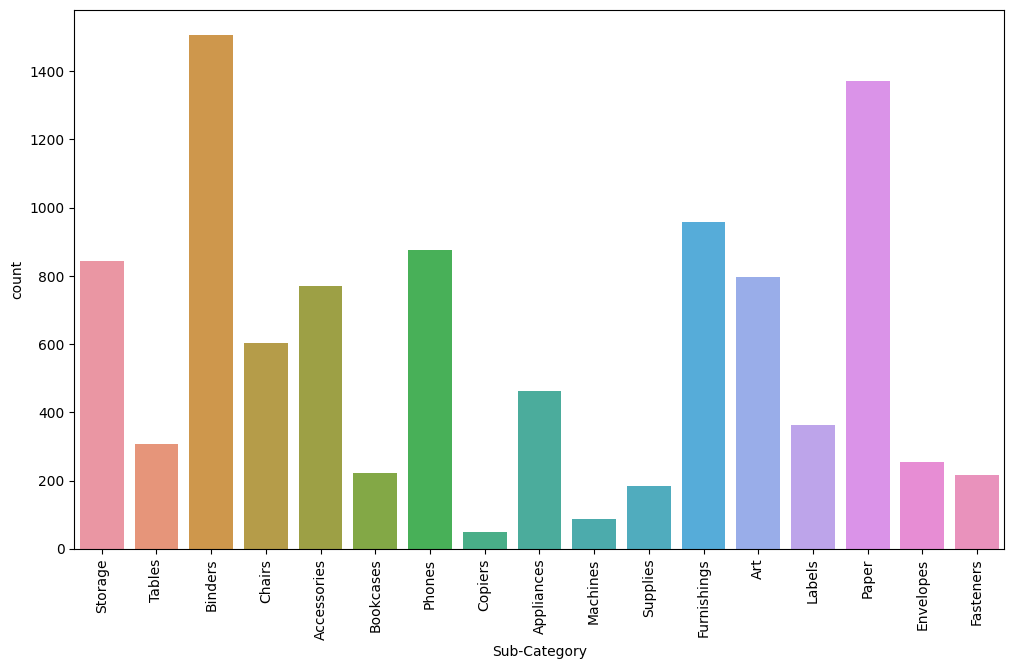

In [48]:
plt.figure(figsize=(12,7))
sns.countplot(x=new_data["Sub-Category"])
plt.xticks(rotation = 90)
plt.show()

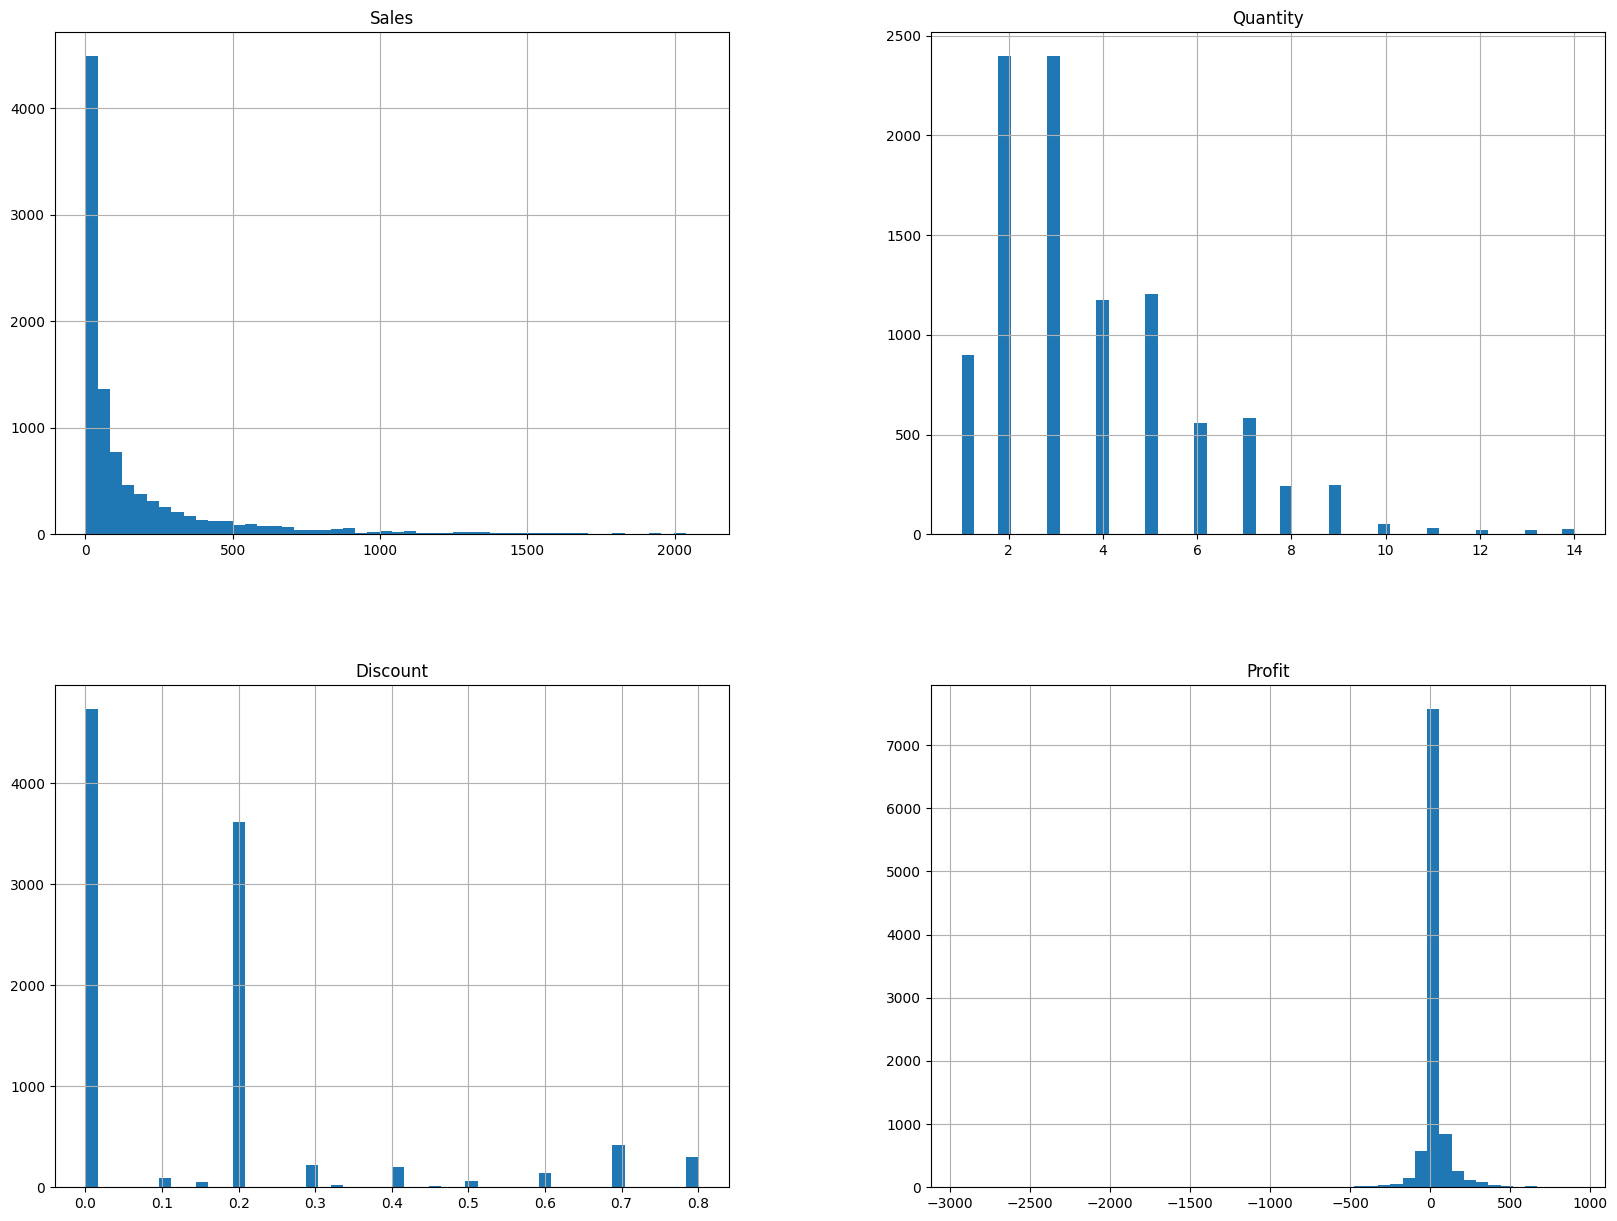

In [49]:
new_data.hist(bins=50,figsize=(20,15))
plt.show()

### Top 10 Profitable Cities.x

In [50]:
top_10_cities = new_data.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top_10_cities.head(10)

,City,Profit
329,New York City,34897.5783
266,Los Angeles,24592.5499
452,Seattle,17581.2251
438,San Francisco,15678.3905
123,Detroit,6854.4448
94,Columbus,5132.7195
437,San Diego,4969.8885
407,Richmond,4872.7471
215,Jackson,4688.6484
93,Columbia,4335.1267


In [51]:
top_10_cities = new_data.groupby("City")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
top_10_cities.head(10)

,City,Discount
374,Philadelphia,174.10
207,Houston,141.82
80,Chicago,120.10
109,Dallas,56.30
266,Los Angeles,53.15
329,New York City,49.70
94,Columbus,38.50
216,Jacksonville,35.15
438,San Francisco,33.60
452,Seattle,27.00


### Top 10 Profitable Sub-Categories.

In [52]:
top_10_sub_categories = new_data.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
top_10_sub_categories.head(10)

,Sub-Category,Profit
0,Accessories,39503.4923
13,Phones,37886.6451
12,Paper,34053.5693
5,Chairs,21989.2644
14,Storage,19864.5829
1,Appliances,14633.8139
6,Copiers,13974.6680
9,Furnishings,13059.1436
7,Envelopes,6964.1767
2,Art,6527.7870


In [53]:
dt_top_10_sub_categories = new_data.groupby("Sub-Category")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
dt_top_10_sub_categories.head(10)

,Sub-Category,Discount
3,Binders,564.40
13,Phones,136.20
9,Furnishings,132.40
5,Chairs,103.10
12,Paper,102.60
16,Tables,82.15
1,Appliances,77.60
14,Storage,63.20
0,Accessories,60.80
2,Art,59.60


### Top 2 sales Region

In [54]:
top_10_region = new_data.groupby("Region")["Sales"].sum().reset_index().sort_values(by="Sales",ascending=False)
top_10_region.head(2)

,Region,Sales
3,West,592610.3555
1,East,506698.1940


## Thank You !